In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import numpy as np
# Load and preprocess the MNIST dataset
import matplotlib.pyplot as plt

In [2]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)



In [3]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.5, random_state=1)

In [75]:
def DNN():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu')) 
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [76]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [77]:
model = DNN()
rate = 0.1
adam = Adam(learning_rate=rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
history = model.fit(train_x, train_y, epochs=5, batch_size=128, validation_data=(valid_x, valid_y))

Epoch 1/5
235/235 [==============================] - 2s 7ms/step - loss: 1.4572 - accuracy: 0.6571 - f1_m: 0.6415 - precision_m: 0.8050 - recall_m: 0.5452 - val_loss: 0.8568 - val_accuracy: 0.7289 - val_f1_m: 0.7133 - val_precision_m: 0.8109 - val_recall_m: 0.6373
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6819 - accuracy: 0.7952 - f1_m: 0.7961 - precision_m: 0.8434 - recall_m: 0.7547 - val_loss: 0.6974 - val_accuracy: 0.8113 - val_f1_m: 0.8074 - val_precision_m: 0.8489 - val_recall_m: 0.7701
Epoch 3/5
235/235 [==============================] - 1s 6ms/step - loss: 0.6254 - accuracy: 0.8214 - f1_m: 0.8218 - precision_m: 0.8643 - recall_m: 0.7840 - val_loss: 0.6414 - val_accuracy: 0.8082 - val_f1_m: 0.8109 - val_precision_m: 0.8537 - val_recall_m: 0.7725
Epoch 4/5
235/235 [==============================] - 2s 7ms/step - loss: 0.6439 - accuracy: 0.8167 - f1_m: 0.8164 - precision_m: 0.8636 - recall_m: 0.7749 - val_loss: 0.6975 - val_accuracy: 0.8179 - val_f1

In [78]:
test_loss, test_accuracy, test_f1, test_precision, test_recall= model.evaluate(test_x, test_y)

print('Test Loss: ',test_loss,'\nTest Accuracy: ',test_accuracy,'\nF1 Score: ',
      test_f1,'\nPrecision Score: ',test_precision,'Recall Score: ',test_recall)

313/313 [==============================] - 1s 2ms/step - loss: 0.7892 - accuracy: 0.7850 - f1_m: 0.7784 - precision_m: 0.8327 - recall_m: 0.7329
Test Loss:  0.7892276644706726 
Test Accuracy:  0.7850000262260437 
F1 Score:  0.7783873677253723 
Precision Score:  0.832656979560852 Recall Score:  0.7329273223876953


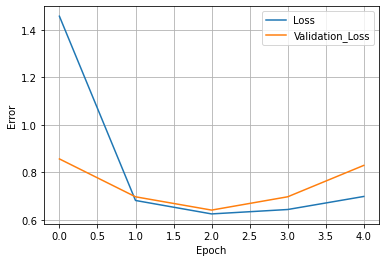

In [79]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation_Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

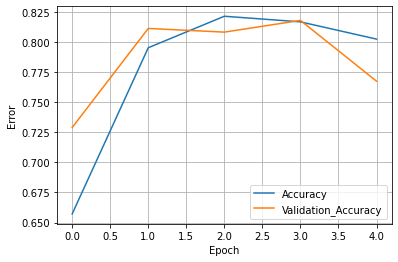

In [80]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)  

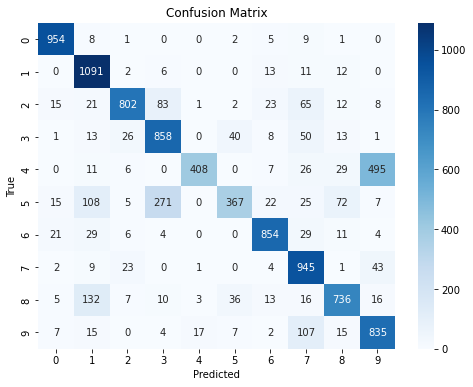

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       980
           1       0.76      0.96      0.85      1135
           2       0.91      0.78      0.84      1032
           3       0.69      0.85      0.76      1010
           4       0.95      0.42      0.58       982
           5       0.81      0.41      0.55       892
           6       0.90      0.89      0.89       958
           7       0.74      0.92      0.82      1028
           8       0.82      0.76      0.78       974
           9       0.59      0.83      0.69      1009

    accuracy                           0.79     10000
   macro avg       0.81      0.78      0.77     10000
weighted avg       0.81      0.79      0.77     10000



In [81]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Assuming you have your trained model 'model' and test data 'test_images'

# Make predictions on the test data
predictions = model.predict(test_x)
predicted_labels = np.argmax(predictions, axis=1)  # Convert one-hot encoded labels to class labels

# True labels
true_labels = np.argmax(test_y, axis=1)

# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a classification report
class_report = classification_report(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n", class_report)


In [82]:
DNN()
rate = 0.01
adam = Adam(learning_rate=rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
history = model.fit(train_x, train_y, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
188/188 [==============================] - 2s 6ms/step - loss: 0.5795 - accuracy: 0.8401 - f1_m: 0.8425 - precision_m: 0.8736 - recall_m: 0.8138 - val_loss: 0.5153 - val_accuracy: 0.8493 - val_f1_m: 0.8541 - val_precision_m: 0.8833 - val_recall_m: 0.8269
Epoch 2/5
188/188 [==============================] - 1s 4ms/step - loss: 0.4913 - accuracy: 0.8626 - f1_m: 0.8654 - precision_m: 0.8908 - recall_m: 0.8416 - val_loss: 0.4638 - val_accuracy: 0.8713 - val_f1_m: 0.8763 - val_precision_m: 0.8978 - val_recall_m: 0.8559
Epoch 3/5
188/188 [==============================] - 1s 5ms/step - loss: 0.4579 - accuracy: 0.8705 - f1_m: 0.8723 - precision_m: 0.8944 - recall_m: 0.8514 - val_loss: 0.4609 - val_accuracy: 0.8685 - val_f1_m: 0.8723 - val_precision_m: 0.8929 - val_recall_m: 0.8528
Epoch 4/5
188/188 [==============================] - 1s 5ms/step - loss: 0.4428 - accuracy: 0.8743 - f1_m: 0.8766 - precision_m: 0.8983 - recall_m: 0.8561 - val_loss: 0.4446 - val_accuracy: 0.8750 - val_f1

In [95]:
test_loss, test_accuracy, test_f1, test_precision, test_recall= model.evaluate(test_x, test_y)

print('Test Loss: ',test_loss,'\nTest Accuracy: ',test_accuracy,'\nF1 Score: ',
      test_f1,'\nPrecision Score: ',test_precision,'Recall Score: ',test_recall)

313/313 [==============================] - 1s 2ms/step - loss: 0.4314 - accuracy: 0.8761 - f1_m: 0.8778 - precision_m: 0.9005 - recall_m: 0.8570
Test Loss:  0.4314352571964264 
Test Accuracy:  0.8761000037193298 
F1 Score:  0.8778157830238342 
Precision Score:  0.9005290865898132 Recall Score:  0.8570287823677063


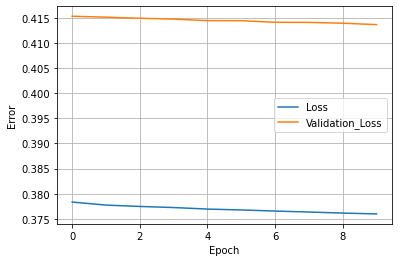

In [96]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation_Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

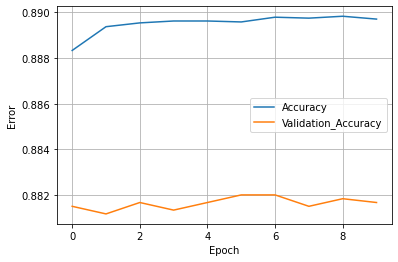

In [97]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)  

In [98]:
DNN()
rate = 0.001
adam = Adam(learning_rate=rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
history = model.fit(train_x, train_y, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
188/188 [==============================] - 2s 5ms/step - loss: 0.3784 - accuracy: 0.8895 - f1_m: 0.8918 - precision_m: 0.9141 - recall_m: 0.8707 - val_loss: 0.4135 - val_accuracy: 0.8820 - val_f1_m: 0.8864 - val_precision_m: 0.9113 - val_recall_m: 0.8629
Epoch 2/5
188/188 [==============================] - 1s 4ms/step - loss: 0.3759 - accuracy: 0.8903 - f1_m: 0.8928 - precision_m: 0.9152 - recall_m: 0.8716 - val_loss: 0.4129 - val_accuracy: 0.8838 - val_f1_m: 0.8869 - val_precision_m: 0.9107 - val_recall_m: 0.8646
Epoch 3/5
188/188 [==============================] - 1s 5ms/step - loss: 0.3741 - accuracy: 0.8908 - f1_m: 0.8931 - precision_m: 0.9156 - recall_m: 0.8717 - val_loss: 0.4123 - val_accuracy: 0.8835 - val_f1_m: 0.8878 - val_precision_m: 0.9127 - val_recall_m: 0.8644
Epoch 4/5
188/188 [==============================] - 1s 5ms/step - loss: 0.3724 - accuracy: 0.8916 - f1_m: 0.8935 - precision_m: 0.9163 - recall_m: 0.8719 - val_loss: 0.4106 - val_accuracy: 0.8853 - val_f1

In [99]:
test_loss, test_accuracy, test_f1, test_precision, test_recall= model.evaluate(test_x, test_y)

print('Test Loss: ',test_loss,'\nTest Accuracy: ',test_accuracy,'\nF1 Score: ',
      test_f1,'\nPrecision Score: ',test_precision,'Recall Score: ',test_recall)

313/313 [==============================] - 1s 2ms/step - loss: 0.4262 - accuracy: 0.8781 - f1_m: 0.8797 - precision_m: 0.9010 - recall_m: 0.8601
Test Loss:  0.4261710047721863 
Test Accuracy:  0.8780999779701233 
F1 Score:  0.879712700843811 
Precision Score:  0.9010497331619263 Recall Score:  0.8601238131523132


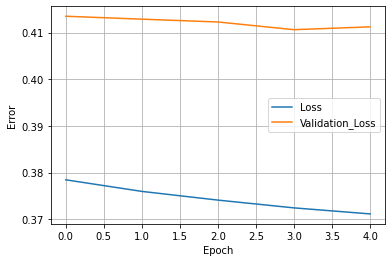

In [100]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation_Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

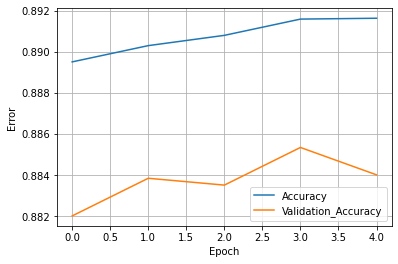

In [101]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)  

In [102]:
DNN()
rate = 0.0001
adam = Adam(learning_rate=rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
history = model.fit(train_x, train_y, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
188/188 [==============================] - 2s 5ms/step - loss: 0.3678 - accuracy: 0.8925 - f1_m: 0.8955 - precision_m: 0.9171 - recall_m: 0.8751 - val_loss: 0.4107 - val_accuracy: 0.8843 - val_f1_m: 0.8879 - val_precision_m: 0.9119 - val_recall_m: 0.8652
Epoch 2/10
188/188 [==============================] - 1s 4ms/step - loss: 0.3674 - accuracy: 0.8928 - f1_m: 0.8949 - precision_m: 0.9167 - recall_m: 0.8743 - val_loss: 0.4105 - val_accuracy: 0.8845 - val_f1_m: 0.8876 - val_precision_m: 0.9120 - val_recall_m: 0.8646
Epoch 3/10
188/188 [==============================] - 1s 5ms/step - loss: 0.3671 - accuracy: 0.8928 - f1_m: 0.8947 - precision_m: 0.9168 - recall_m: 0.8739 - val_loss: 0.4104 - val_accuracy: 0.8843 - val_f1_m: 0.8879 - val_precision_m: 0.9122 - val_recall_m: 0.8651
Epoch 4/10
188/188 [==============================] - 1s 5ms/step - loss: 0.3669 - accuracy: 0.8935 - f1_m: 0.8954 - precision_m: 0.9171 - recall_m: 0.8749 - val_loss: 0.4102 - val_accuracy: 0.8840 - va

In [103]:
test_loss, test_accuracy, test_f1, test_precision, test_recall= model.evaluate(test_x, test_y)

print('Test Loss: ',test_loss,'\nTest Accuracy: ',test_accuracy,'\nF1 Score: ',
      test_f1,'\nPrecision Score: ',test_precision,'Recall Score: ',test_recall)

313/313 [==============================] - 1s 2ms/step - loss: 0.4252 - accuracy: 0.8779 - f1_m: 0.8799 - precision_m: 0.9023 - recall_m: 0.8593
Test Loss:  0.4252294898033142 
Test Accuracy:  0.8779000043869019 
F1 Score:  0.8798612356185913 
Precision Score:  0.9022606015205383 Recall Score:  0.8593250513076782


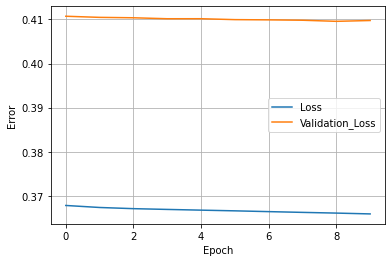

In [105]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation_Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

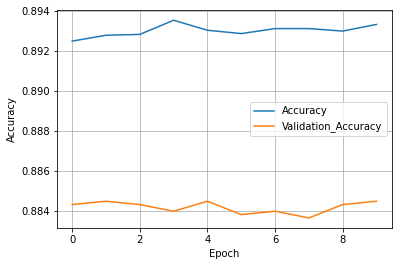

In [106]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)  

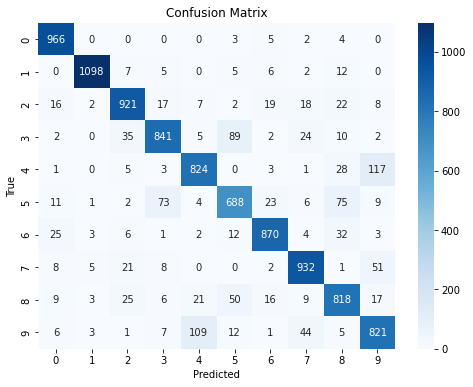

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.95       980
           1       0.98      0.97      0.98      1135
           2       0.90      0.89      0.90      1032
           3       0.88      0.83      0.85      1010
           4       0.85      0.84      0.84       982
           5       0.80      0.77      0.78       892
           6       0.92      0.91      0.91       958
           7       0.89      0.91      0.90      1028
           8       0.81      0.84      0.83       974
           9       0.80      0.81      0.81      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [107]:
# Assuming you have your trained model 'model' and test data 'test_images'

# Make predictions on the test data
predictions = model.predict(test_x)
predicted_labels = np.argmax(predictions, axis=1)  # Convert one-hot encoded labels to class labels

# True labels
true_labels = np.argmax(test_y, axis=1)

# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a classification report
class_report = classification_report(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n", class_report)


In [108]:
model.get_weights()

[array([[-0.06408589,  0.05709546, -0.0008597 , ...,  0.06153589,
         -0.05630429,  0.02292602],
        [ 0.03101602, -0.07079216,  0.0125587 , ...,  0.02084866,
          0.05748164, -0.03826611],
        [-0.03889458,  0.03725553,  0.07067085, ..., -0.0065791 ,
          0.03351033, -0.03486742],
        ...,
        [-0.04362544,  0.05151277,  0.01000571, ...,  0.06875464,
          0.03887133, -0.00275838],
        [-0.0690427 ,  0.02877388,  0.00084653, ...,  0.06702644,
         -0.03218278,  0.06880466],
        [-0.07823411,  0.00431377, -0.05063301, ...,  0.0170483 ,
          0.07601313,  0.05740578]], dtype=float32),
 array([ 0.3044812 , -0.5370001 , -0.722711  , -0.7291155 , -0.85692173,
        -0.6933273 , -0.60050714, -0.44887304, -0.32260305, -0.6004525 ,
        -0.59952134, -0.4492275 , -1.787857  , -0.629439  , -0.5974086 ,
        -0.65938044, -0.66506124, -0.9167281 , -1.3721652 , -0.60036534,
        -0.6004932 , -0.6004271 , -0.60044336, -0.6002841 , -0.506

In [110]:
from sklearn.metrics import f1_score
f1_score(test_y, pred_y, average=None)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets